# House Price Prediction with Regression

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path

In [31]:
# path where dataset is allocate
dataset_path = Path('Dataset')
# loading the data in the path
data = pd.read_csv(dataset_path / 'housing.csv')

In [33]:
# data shape
data.shape

(20640, 10)

In [35]:
# visualize the features
data.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [37]:
# target variable that we want to predict is median_house_value
# the other features are the inpute features that we will use to predict the our target variable

In [39]:
# we cant use the feature ocean_proximity directly because it has some keyword that our model cant understand  right away
data["ocean_proximity"].unique().tolist()

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

# Exploring our dataset

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [44]:
# asa we see all features has 20640 values except the featur "total_bedrooms" has "20433"
# sice there few values missing we can drop them otherwise we can try istimate the value should be there
# deleting the null values by returning dataset with only non-null value and save it in our data objet
data.dropna(inplace=True)

In [46]:
# seeing the results in our data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [48]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
# the features we will use to train our model in
X = data.drop(['median_house_value'], axis=1) # axis=1 to drop the COLUMN
# the feature we want to predict
y = data['median_house_value']

In [50]:
# the splittingg 80% for training 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [52]:
# joining the X_train and y_train se we can explore correlations
train_data = X_train.join(y_train)

In [54]:
train_data.shape

(16346, 10)

In [56]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1820,-122.30,37.92,32.0,3943.0,605.0,1524.0,614.0,6.0677,NEAR BAY,321600.0
14790,-117.12,32.56,20.0,2524.0,682.0,1819.0,560.0,2.9286,NEAR OCEAN,257700.0
19244,-122.76,38.52,6.0,2073.0,388.0,826.0,375.0,3.0550,<1H OCEAN,224100.0
8581,-118.41,33.89,31.0,702.0,161.0,236.0,144.0,5.0497,<1H OCEAN,500001.0
12382,-116.38,33.73,10.0,11836.0,2405.0,3811.0,1570.0,4.0079,INLAND,134500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

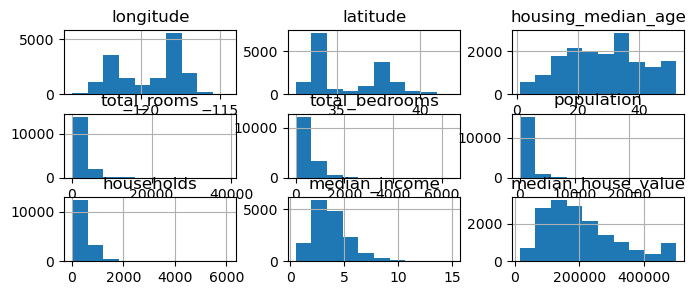

In [58]:
# histograms for the distributions of the individual features
train_data.hist(figsize=(8,3))

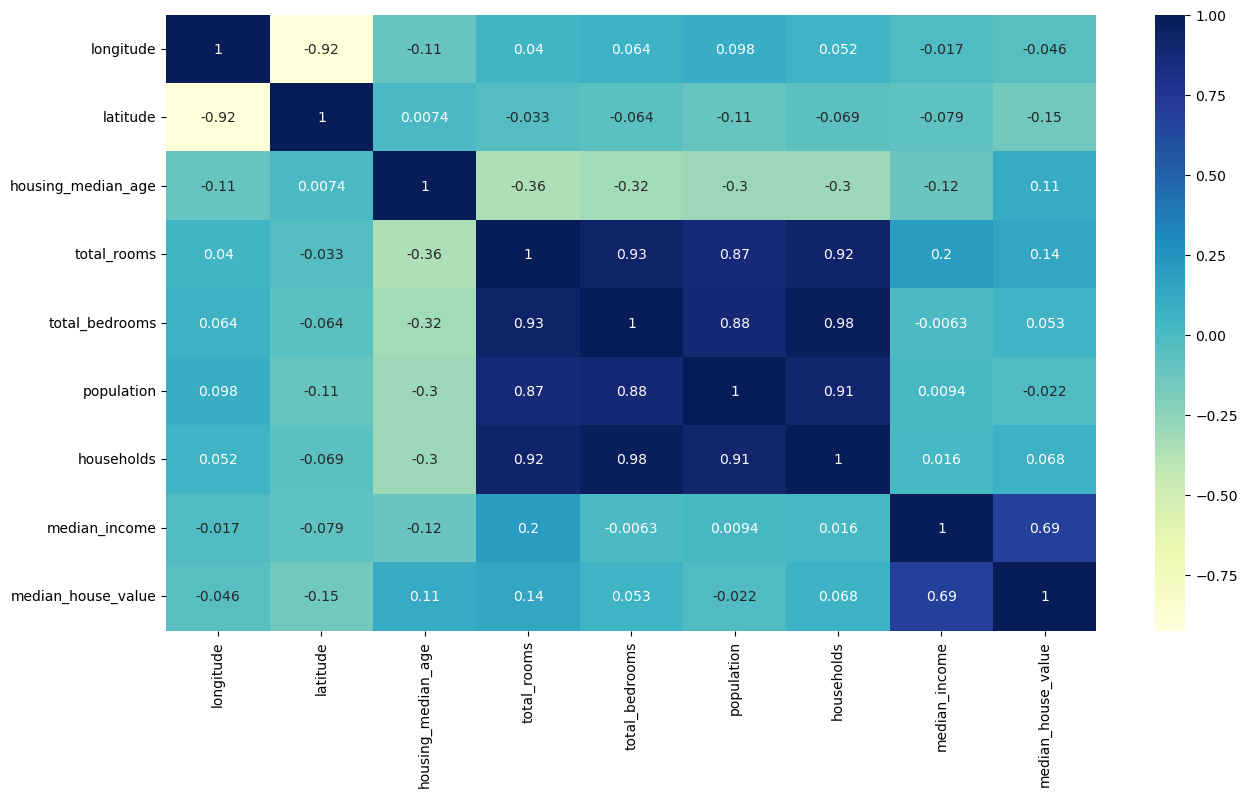

In [123]:
# visualize a correlation matrix with the target variable
# dropping the "ocean_proximity" because its not numerical
data_without_OP = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15, 8))
sns.heatmap(data_without_OP.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [27]:
# in the heatmap of correlation we can see that the feature median_income is highly correlated with our target "medin_house_value"

# Pre-Processing

In [125]:
'''
In the histograms, we observe that some features are skewed.
To address this, we apply a log transformation with an added constant of 1 to handle zero values and stabilize the variance.

but before doing that we have to handle the ocean_proximity feature, which contains categorical data rather than numeric values,
so we use one-hot encoding. This technique involves creating a separate binary column for each unique value in ocean_proximity.
Each new column will indicate the presence (1) or absence (0) of a particular category,
converting the categorical feature into a format suitable for machine learning models.
'''
train_data_encoded = pd.get_dummies(train_data, columns=['ocean_proximity'], prefix='ocean_proximity')
# change the order of features so "median_house_value" its the last column
new_order = [
    'longitude',
    'latitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND',
    'ocean_proximity_ISLAND',
    'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN',
    'median_house_value'
]
train_data_encoded = train_data_encoded[new_order]

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

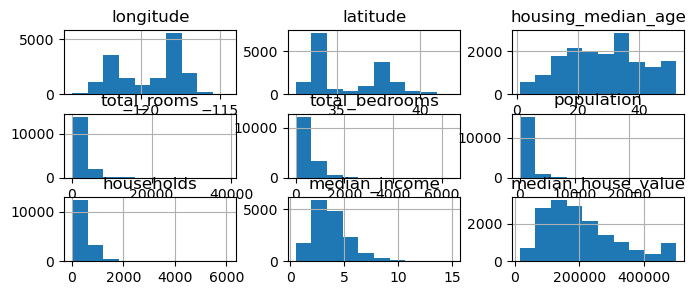

In [127]:
train_data_encoded.hist(figsize=(8,3))

In [129]:
from scipy.stats import skew
skewness = train_data_encoded.apply(lambda x: skew(x.dropna()))
print(skewness[skewness > 1]) 

total_rooms                    4.152019
total_bedrooms                 3.457834
population                     4.053026
households                     3.444869
median_income                  1.608285
ocean_proximity_ISLAND        63.902271
ocean_proximity_NEAR BAY       2.469192
ocean_proximity_NEAR OCEAN     2.225543
dtype: float64


In [131]:
# Applying Log transformation for the features with high and moderate skewness
# we dont apply the transfromation to the'ocean_proximity' because they are encoded features
train_data_encoded['total_rooms'] = np.log(train_data_encoded['total_rooms'] + 1)
train_data_encoded['total_bedrooms'] = np.log(train_data_encoded['total_bedrooms'] + 1)
train_data_encoded['population'] = np.log(train_data_encoded['population'] + 1)
train_data_encoded['households'] = np.log(train_data_encoded['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

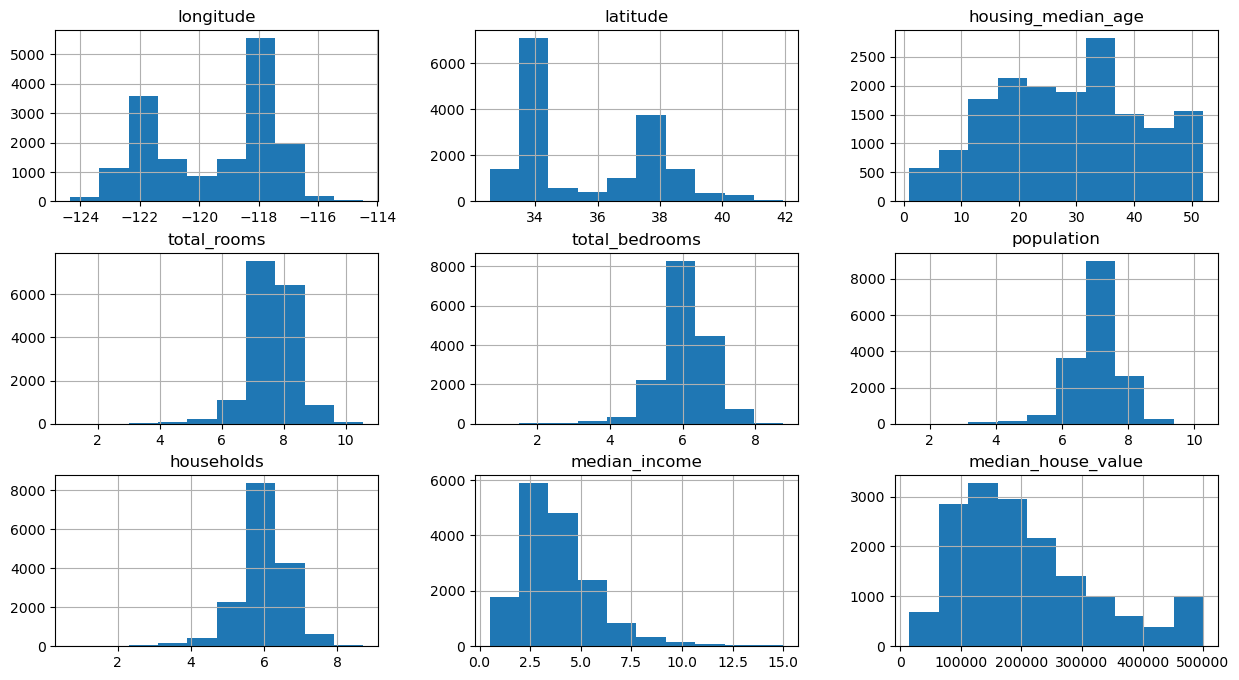

In [135]:
train_data_encoded.hist(figsize=(15,8))

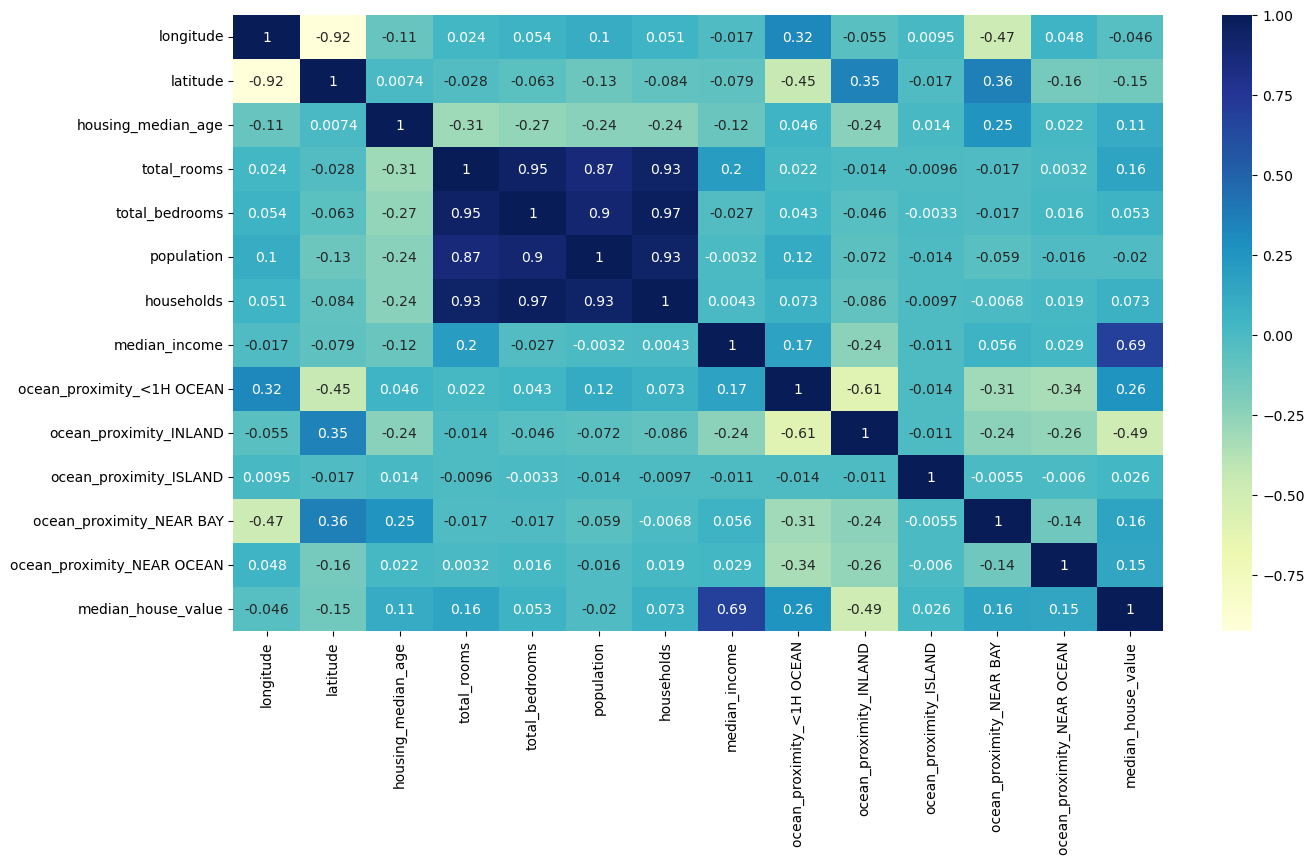

In [137]:
# visualize a heatmap of correlation with the target variable
plt.figure(figsize=(15, 8)) 
sns.heatmap(train_data_encoded.corr(), annot=True, cmap="YlGnBu")
plt.show()

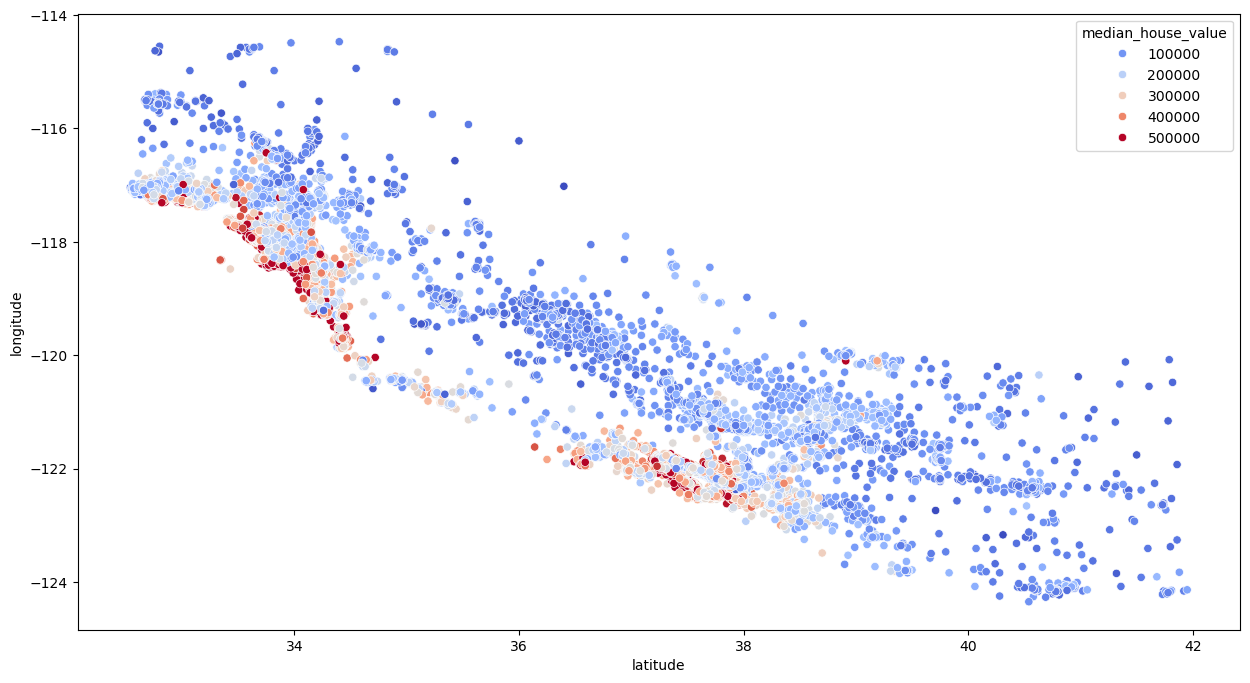

In [140]:
#the position of the individual blocks influnces the pricing 
plt.figure(figsize=(15, 8)) 
sns.scatterplot(x="latitude", y="longitude", data=train_data_encoded, hue= "median_house_value", palette="coolwarm")
plt.show()

# Feature Engineering

In [142]:
# take features we already had and combine them the obtine new features
# from the features we have we can create new features that has more value
train_data_encoded['bedroom_per_room'] = train_data_encoded['total_bedrooms'] / train_data_encoded['total_rooms']
train_data_encoded['rooms_per_household'] = train_data_encoded['total_rooms'] / train_data_encoded['households']

In [148]:
# change the order of features so "median_house_value" its the last column
new_order = [
    'longitude',
    'latitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND',
    'ocean_proximity_ISLAND',
    'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN',
    'bedroom_per_room',
    'rooms_per_household',
    'median_house_value'
]
train_data_encoded = train_data_encoded[new_order]

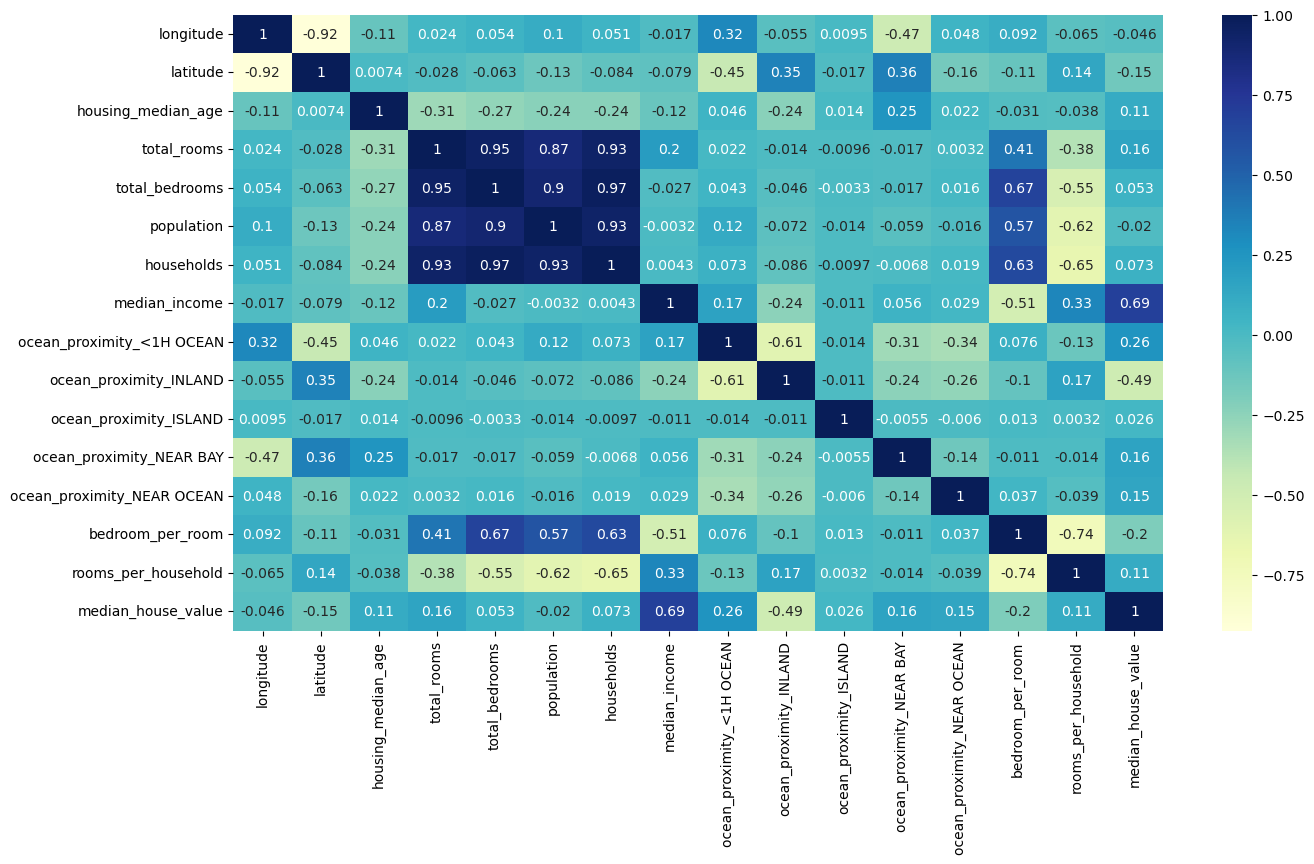

In [150]:
plt.figure(figsize=(15, 8)) 
sns.heatmap(train_data_encoded.corr(), annot=True, cmap="YlGnBu")
plt.show()

# Linear Regression Model

In [154]:
from sklearn.linear_model import LinearRegression
# split the training encoded data with new features to X that are our features and y the target we want to predict
X_train = train_data_encoded.drop(['median_house_value'],axis=1)
y_train = train_data_encoded['median_house_value']
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

# Pre-Processing and Feature Engineering For test set 

In [159]:
# a better approch is doing the pre-processing and the feature engineering for all our data and then split it

In [167]:
# Combine the features (X_test) with the target variable (y_test) into a single DataFrame
test_data = X_test.join(y_test)

# Apply one-hot encoding to the 'ocean_proximity' column
# This creates separate binary columns for each category in 'ocean_proximity'
test_data_encoded = pd.get_dummies(test_data, columns=['ocean_proximity'], prefix='ocean_proximity')

# Apply log transformation to certain features to reduce skewness
# Adding 1 to avoid taking the log of zero or negative values
test_data_encoded['total_rooms'] = np.log(test_data_encoded['total_rooms'] + 1)
test_data_encoded['total_bedrooms'] = np.log(test_data_encoded['total_bedrooms'] + 1)
test_data_encoded['population'] = np.log(test_data_encoded['population'] + 1)
test_data_encoded['households'] = np.log(test_data_encoded['households'] + 1)

# Create new features based on existing ones
# 'bedroom_per_room' is the ratio of bedrooms to rooms
# 'rooms_per_household' is the ratio of rooms to households
test_data_encoded['bedroom_per_room'] = test_data_encoded['total_bedrooms'] / test_data_encoded['total_rooms']
test_data_encoded['rooms_per_household'] = test_data_encoded['total_rooms'] / test_data_encoded['households']

# Define the order of columns to match the order we have on training set
new_order = [
    'longitude',
    'latitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND',
    'ocean_proximity_ISLAND',
    'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN',
    'bedroom_per_room',
    'rooms_per_household',
    'median_house_value'
]

# Reorder the columns in the DataFrame according to 'new_order'
test_data_encoded = test_data_encoded[new_order]

# Separate the target variable from the features
# Drop 'median_house_value' from the feature set (X_test)
# Assign 'median_house_value' to y_test
X_test = test_data_encoded.drop(['median_house_value'], axis=1)
y_test = test_data_encoded['median_house_value']

In [173]:
reg.score(X_test, y_test)

0.6677802057791391